# PCA Lab

In this lab we will be practicing using PCA to analyze a genomic dataset


## The data

*Arabidopsis thaliana*. This data was downloaded from [The 1001 Genomes Project](https://1001genomes.org/data/GMI-MPI/releases/v3.1) and the file is called `1001genomes_snp-short-indel_only_ACGTN.vcf.gz` and is in the '/mnt/research/PLB812_FS24_S001/12_PCA' folder.

*MobaXterm* or <br>
*Workin on Shell - MSU HPCC OnDemand*: *Open in Terminal > _Development Nodes > choose any Host,`$`dev-intel18 for example*:<br>
$ ssh


*change directory* <br>
`$` cd /mnt/home/bistaraj/PLB_812/h_GenomeVariation

`$` pwd<br>
`$` ls




## Running PCA 

We will be using the software Plink to run PCA. Our first step will be loading the Plink module on the hpcc.

`$module purge` <br>
`$module load PLINK/2.00a3.7-gfbf-2023a`

Next, if your data is in a vcf file, you need to convert it to a plink format.  We will also want to filter these files to give us SNPs that are not in linkage disequilibrium with each other, and to remove rare sites or sites with a lot of missing data. You can look up each of the options in the following command to see how they work.

`$plink2 -bfile [file-prefix] --indep-pairwise 100 20 0.2 --geno 0.05 --max-alleles 2 --maf 0.05 --allow-extra-chr --make-bed --out [file-prefix]_filtered`

*customized codes*: <br>
`$plink2 -vcf /mnt/research/PLB812_FS24_S001/12_PCA/1001genomes_snp-short-indel_only_ACGTN.vcf.gz --indep-pairwise 100 20 0.2 --geno 0.05 --max-alleles 2 --maf 0.05 --allow-extra-chr --make-bed --out 1001GenomesSNP_ShortIndel_filtered`

(... path and file name of the vcf file (named `1001genomes_snp-short-indel_only_ACGTN.vcf.gz` in the research folder)). 

If you were to do this another time and your data wass already in a plink format (file names end with **.bed** and **.bim** and **.fam** and have the same file prefix), you could run the following command:

`$plink2 -bfile [file-prefix] --indep-pairwise 100 20 0.2 --geno 0.05 --max-alleles 2 --maf 0.05 --allow-extra-chr --make-bed --out [file-prefix].filtered`    (not to be run for the moment, if the plink format files were created with the above command)

**Once you have filtered your plink files of SNPs, it is time to run the PCA analysis!**

`$plink2 -bfile [file-prefix] --extract [file-prefix].filtered.in --pca --allow-extra-chr --out [file-prefix]-pca`

*customized codes (name and path of bfile, prune.in file, that of output pca*: <br>
`$plink2 -bfile /mnt/research/PLB812_FS24_S001/12_PCA/arabidopsis --extract /mnt/research/PLB812_FS24_S001/12_PCA/arabidopsis.prune.in --pca --allow-extra-chr --out 1001GenomesSNP_ShortIndel_pca`

*** No prune.in file created in my working directory. Used the arabdopsis's respective files in the PLB research direcotry.


Note the `--extract` flag here directs you towards a list of sites that was generated in the previous filtered set. If you were to skip this, plink would try to run the PCA on all the sites, not just the sites that passed the filters. 

You can use **less** to look at the output files from this step, which will be `[file-prefix]-pca.eigenvec` and `[file-prefix]-pca.eigenval`.

**ls** or **less!**

## Subsampling SNPs

We talked in class about how the number of SNPs is important for making a PCA. In the lab we'll investigate this using the *A. thaliana* data.

We can efficiently subsample a smaller dataset by sampling from the [file-prefix].filtered.in site, and then only using these sites when we run the PCA. To subsample 100 sites, use the following bash command:

`shuf [file-prefix].filtered.in | head -n 100 > [file-prefix].100.in`


*subsample of 100*: <br>
`shuf /mnt/research/PLB812_FS24_S001/12_PCA/arabidopsis.prune.in | head -n 100 > 1001GenomesSNP_ShortIndel.100.in`

*subsample of 1000*: <br>
`shuf /mnt/research/PLB812_FS24_S001/12_PCA/arabidopsis.prune.in | head -n 1000 > 1001GenomesSNP_ShortIndel.1000.in`

*subsample of 10000*: <br>
`shuf /mnt/research/PLB812_FS24_S001/12_PCA/arabidopsis.prune.in | head -n 10000 > 1001GenomesSNP_ShortIndel.10000.in`

*subsample of random*: <br>
`shuf /mnt/research/PLB812_FS24_S001/12_PCA/arabidopsis.prune.in | head -n 9998 > 1001GenomesSNP_ShortIndel.100000.in`


Take a second to look at this command and think about what the different parts of it do (or ask a neighbor or Emily!).

Modify the command to take subsamples of 100, 1000, and 10,000 sites.

You can count the number of lines in your `[file-prefix].x.in` files using `wc -l [file]`. Use this to check that your subsampling worked correctly. Then, rerun your PCA on these subsamples.

*counting the number of lines in*: <br>
wc -l 1001GenomesSNP_ShortIndel.100.in<br>
wc -l 1001GenomesSNP_ShortIndel.1000.in<br>
wc -l 1001GenomesSNP_ShortIndel.10000.in<br>
wc -l 1001GenomesSNP_ShortIndel.100000.in<br>
<br>

**PCA of subsets**:<br>

**100:** <br>
$plink2 -bfile /mnt/research/PLB812_FS24_S001/12_PCA/arabidopsis --extract /mnt/home/bistaraj/PLB_812/h_GenomeVariation/1001GenomesSNP_ShortIndel.100.in --pca --allow-extra-chr --out 1001GenomesSNP_ShortIndel_100-pca


**1000:**<br>
$plink2 -bfile /mnt/research/PLB812_FS24_S001/12_PCA/arabidopsis --extract /mnt/home/bistaraj/PLB_812/h_GenomeVariation/1001GenomesSNP_ShortIndel.1000.in --pca --allow-extra-chr --out 1001GenomesSNP_ShortIndel_1000-pca


**10000:** <br>
$plink2 -bfile /mnt/research/PLB812_FS24_S001/12_PCA/arabidopsis --extract /mnt/home/bistaraj/PLB_812/h_GenomeVariation/1001GenomesSNP_ShortIndel.10000.in --pca --allow-extra-chr --out 1001GenomesSNP_ShortIndel_10000-pca






## Making plots

You will need some extra information about the genotypes in your PCA.

This file is called `accessions.csv`.

There is a file called 'pca-plots.Rmd' in the class folder ('/mnt/research/PLB812_FS24_S001/12_PCA') that has code for making PCA plots. Please open it up in Rstudio, edit the paths for your own data, and make PCA plots for all the SNPs and then for PCAs made from each subset.

When you're done, put the PCA plots in this notebook.

<span style="background-color: lightyellow;font-weight: bold;font-size: 1.3em;"> PCA Plots with Full set with all SNPs </span> 

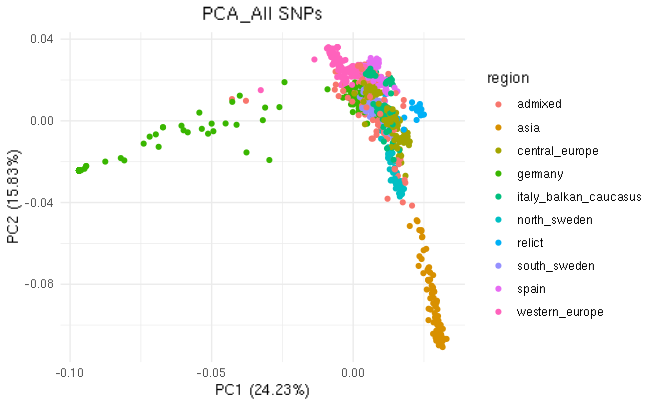
<br><br>
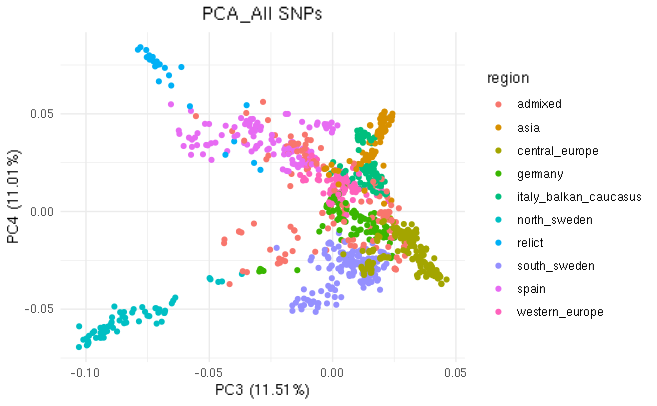
<br><br>
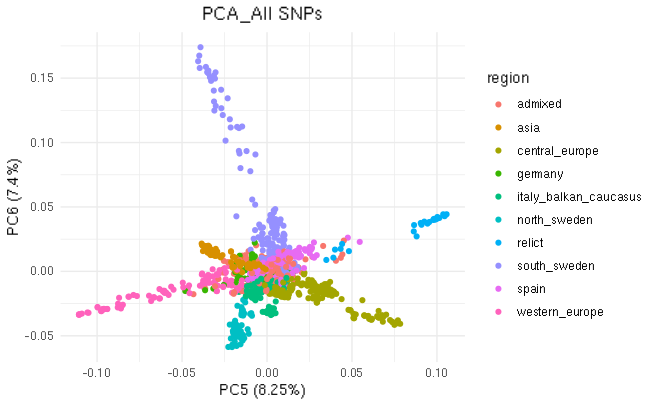
<br><br><br> 


<span style="background-color: lightyellow;font-weight: bold;font-size: 1.3em;"> PCA Plots with Subsample of 10,000 </span> 

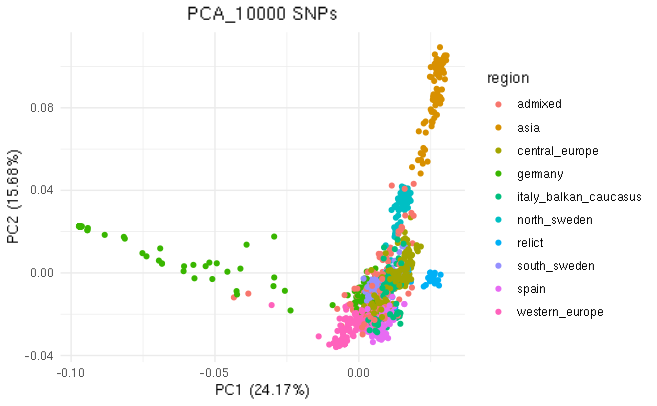
<br><br>
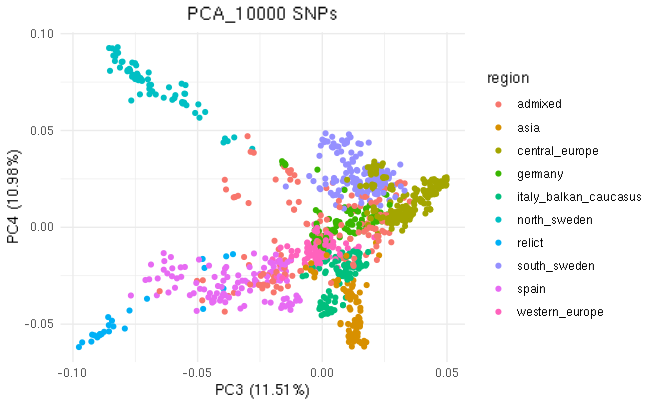
<br><br><br>


<span style="background-color: lightyellow;font-weight: bold;font-size: 1.3em;"> PCA Plots with SubSample of 1,000 </span> 

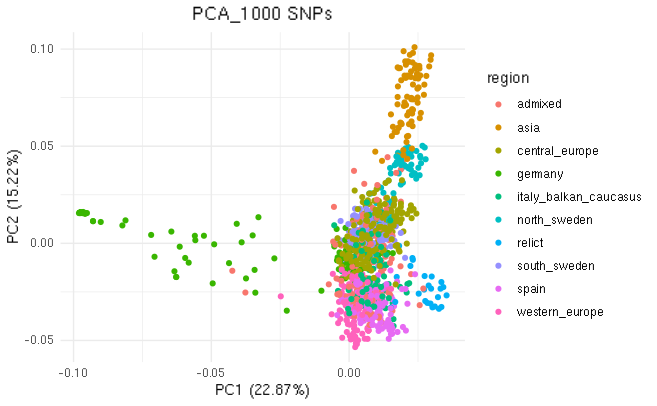
<br><br>
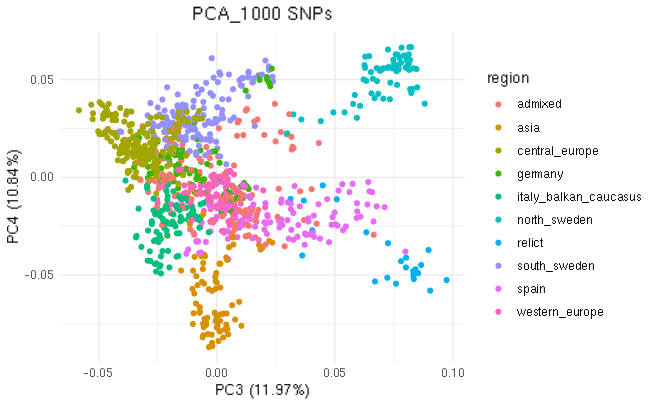
<br><br><br>


<span style="background-color: lightyellow;font-weight: bold;font-size: 1.3em;"> PCA Plots with SubSample of 100 </span> 

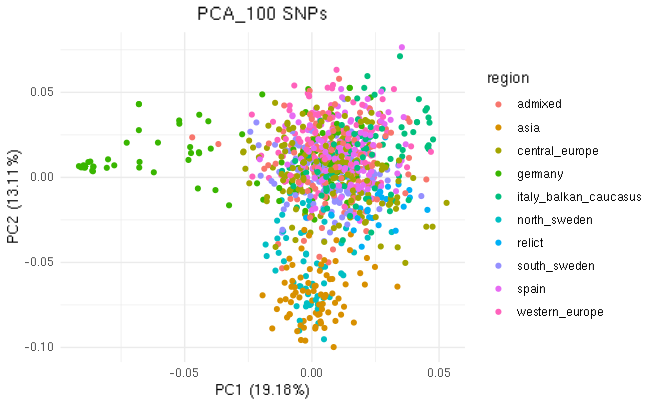
<br><br>
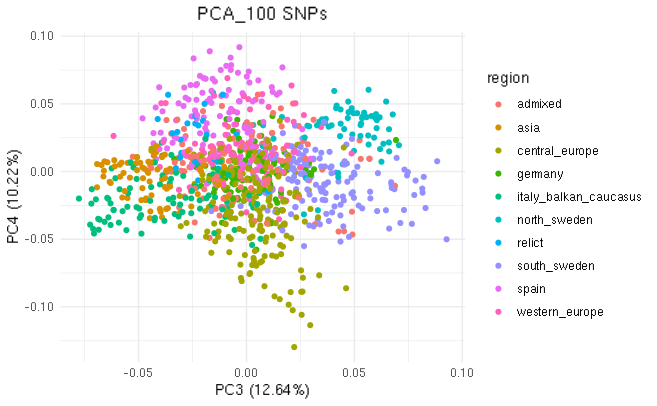<br><br>



## Questions

1. Based on the plot you've made, what are the major axes of variation in your diversity dataset? How do you know this?
   
> Overall, first two principal components explain the most variation in the diversity among samples from different regions. We can see distinct clusters along PC1 and then along PC2. For example; Germany formed a distinct cluster from rest of the regiions along PC1 and Asia samples are different from the rest along PC2 in plots of different SNPs number. The first PC has explained the most variation and the tendency of grouping is gradually decreasing along PC2, PC3, PC4 and so on.

<br>
   
2. How many sites were in the dataset of all SNPs that you used to calculate the PCA without subsampling? How did you find this out?

> There were **41060 SNPs** in the full dataset arabidopsis.prune.in. We can count by running code `wc -l arabidopsis.prune.in`.

<br>
 
3. How did changing the number of SNPs affect the PCA plots you made? How many SNPs would you recommend that another researcher use for Arabidopsis PCA?

> Observing the PCA plots of different subset of SNPs, it's obvious that with decreasing SNPs number, the clustering become weaker and first two principal components explain less proportion of variance compared to those with high number of SNPs. However, irrespective of SNPs number, first two principal components (PC1 the most) have explained the diversity.
> 
> There are only a slight differences in group separation along first few important principal components when observed the PCA plots for the full set of SNPs and the subset of 10,000 SNPs. The clustering is obvious with the subset of 1,000 SNPs as well. Because higher number of SNPs can incur issues with data processing in analysis, the subset of lower SNPs would be more efficient as long as those display the similar diversity. And here, eventhough subset of 1000 also is showing the diversity, I would recommend using the subset of 10,000 SNPs for its better explanation of variance and not so big data to process. 

<br>


## Other helpful stuff:

[The Documentation for Plink2](https://www.cog-genomics.org/plink/2.0/)

[A tutorial on PCA using Plink](https://www.zoology.ubc.ca/~schluter/R/Genomics.html#PCA_with_PLINK2)